In [7]:
import pandas as pd
import numpy as np


df = pd.read_csv("global_power_plant_database.csv")


print(df.head())








df['capacity_mw'] = pd.to_numeric(df['capacity_mw'], errors='coerce')


  country country_long                                              name  \
0     AFG  Afghanistan      Kajaki Hydroelectric Power Plant Afghanistan   
1     AFG  Afghanistan                                      Kandahar DOG   
2     AFG  Afghanistan                                      Kandahar JOL   
3     AFG  Afghanistan     Mahipar Hydroelectric Power Plant Afghanistan   
4     AFG  Afghanistan  Naghlu Dam Hydroelectric Power Plant Afghanistan   

      gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0  GEODB0040538         33.0    32.322    65.1190        Hydro         NaN   
1    WKS0070144         10.0    31.670    65.7950        Solar         NaN   
2    WKS0071196         10.0    31.623    65.7920        Solar         NaN   
3  GEODB0040541         66.0    34.556    69.4787        Hydro         NaN   
4  GEODB0040534        100.0    34.641    69.7170        Hydro         NaN   

  other_fuel2  ... estimated_generation_gwh_2013  \
0         NaN  ...    

C:\Users\Amin\AppData\Local\Temp\ipykernel_19492\196263015.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("global_power_plant_database.csv")


In [8]:
print(df.isnull().sum())

country                               0
country_long                          0
name                                  0
gppd_idnr                             0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                       32992
other_fuel2                       34660
other_fuel3                       34844
commissioning_year                17489
owner                             14068
source                               15
url                                  18
geolocation_source                  419
wepp_id                           18702
year_of_capacity_data             20049
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277


In [9]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [10]:
print(df.isnull().sum())

country                               0
country_long                          0
name                                  0
gppd_idnr                             0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                       32992
other_fuel2                       34660
other_fuel3                       34844
commissioning_year                    0
owner                             14068
source                               15
url                                  18
geolocation_source                  419
wepp_id                           18702
year_of_capacity_data                 0
generation_gwh_2013                   0
generation_gwh_2014                   0
generation_gwh_2015                   0
generation_gwh_2016                   0
generation_gwh_2017                   0
generation_gwh_2018                   0
generation_gwh_2019                   0


In [11]:
df['capacity_mw'] = pd.to_numeric(df['capacity_mw'], errors='coerce')

In [12]:

print(df.describe())


print(df['country_long'].value_counts())


print(df['primary_fuel'].value_counts())


        capacity_mw      latitude     longitude  commissioning_year  \
count  34936.000000  34936.000000  34936.000000        34936.000000   
mean     163.355148     32.816637     -6.972803         1997.414823   
std      489.636072     22.638603     78.405850           16.534583   
min        1.000000    -77.847000   -179.977700         1896.000000   
25%        4.900000     29.256475    -77.641550         1997.414823   
50%       16.745000     39.727750     -2.127100         1997.414823   
75%       75.344250     46.263125     49.502675         2007.000000   
max    22500.000000     71.292000    179.388700         2020.000000   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
count           34936.000000         34936.000000         34936.000000   
mean             2018.218849           592.696107           656.863891   
std                 1.048624           932.025542          1014.795407   
min              2000.000000          -947.600000          -989.

In [13]:

fuel_groups = df.groupby('primary_fuel')['capacity_mw']
mean_capacity = fuel_groups.mean()
print(mean_capacity)

coal_capacity = df[df['primary_fuel'] == 'Coal']['capacity_mw'].dropna()
gas_capacity = df[df['primary_fuel'] == 'Gas']['capacity_mw'].dropna()

from scipy.stats import ttest_ind
stat, p_value = ttest_ind(coal_capacity, gas_capacity, equal_var=False)
print(f"T-test entre charbon et gaz : p-value = {p_value}")


primary_fuel
Biomass             23.972938
Coal               843.579828
Cogeneration        98.731707
Gas                373.449375
Geothermal          67.130952
Hydro              147.171551
Nuclear           2091.855179
Oil                112.878754
Other               84.020000
Petcoke            202.048125
Solar               17.657039
Storage             12.683704
Waste               13.809657
Wave and Tidal      55.220000
Wind                49.224126
Name: capacity_mw, dtype: float64
T-test entre charbon et gaz : p-value = 4.104002519246384e-109


In [16]:

if 'year_of_commissioning' in df.columns:
    df['year_of_commissioning'] = pd.to_numeric(df['year_of_commissioning'], errors='coerce')

    
    yearly_counts = df.groupby('year_of_commissioning').size()

    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 5))
    plt.plot(yearly_counts, marker='o')
    plt.title("Nombre de centrales mises en service par année")
    plt.xlabel("Année")
    plt.ylabel("Nombre de centrales")
    plt.show()


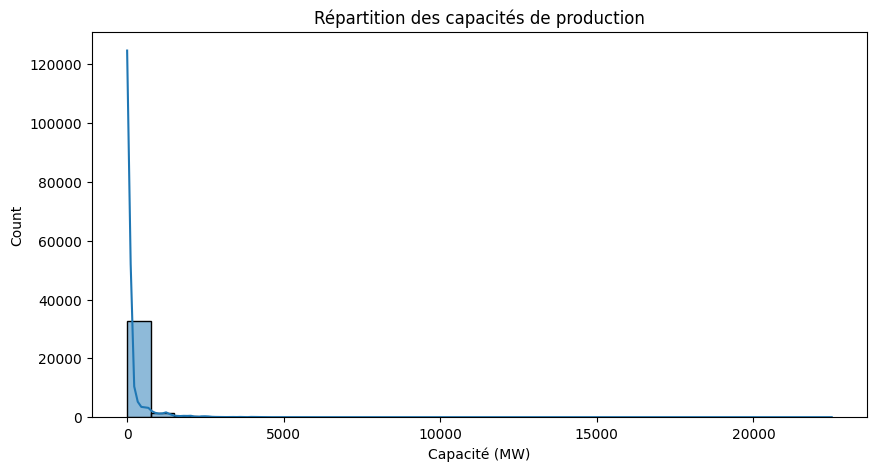

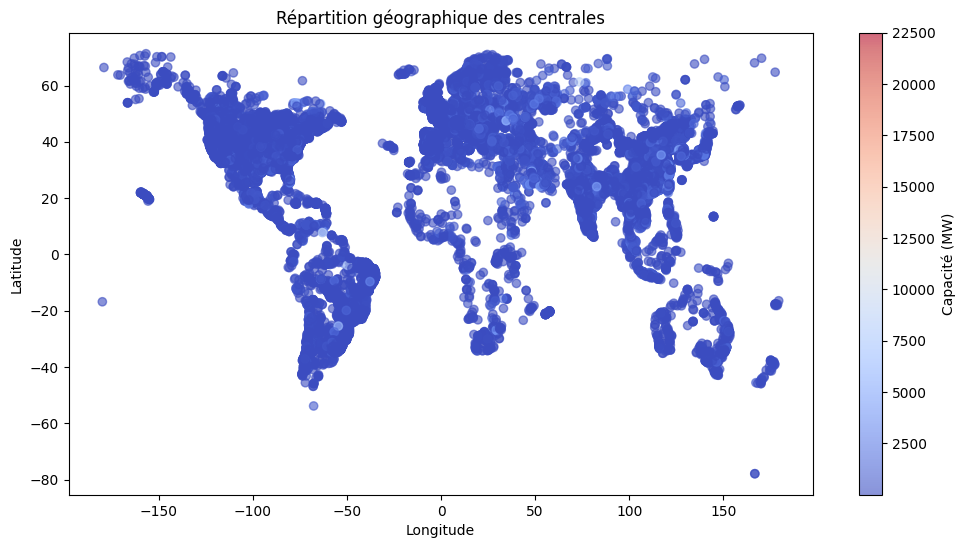

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogramme des capacités de production
plt.figure(figsize=(10, 5))
sns.histplot(df['capacity_mw'], bins=30, kde=True)
plt.title("Répartition des capacités de production")
plt.xlabel("Capacité (MW)")
plt.show()

# Carte des centrales si latitude et longitude sont disponibles
if 'latitude' in df.columns and 'longitude' in df.columns:
    plt.figure(figsize=(12, 6))
    plt.scatter(df['longitude'], df['latitude'], c=df['capacity_mw'], cmap='coolwarm', alpha=0.6)
    plt.colorbar(label="Capacité (MW)")
    plt.title("Répartition géographique des centrales")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()


In [23]:
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
print(correlation_matrix)

df_numeric = df.select_dtypes(include=[np.number])


print("Colonnes non numériques :", df.select_dtypes(exclude=[np.number]).columns.tolist())


correlation_matrix = df_numeric.corr()
print(correlation_matrix)




from numpy.linalg import eig
eigenvalues, eigenvectors = eig(correlation_matrix.fillna(0))
print("Valeurs propres :", eigenvalues)


                               capacity_mw  latitude  longitude  \
capacity_mw                       1.000000 -0.013218   0.151525   
latitude                         -0.013218  1.000000  -0.068354   
longitude                         0.151525 -0.068354   1.000000   
commissioning_year               -0.011203 -0.100961  -0.015458   
year_of_capacity_data             0.021197  0.291502  -0.061436   
generation_gwh_2013               0.314505 -0.020205   0.012949   
generation_gwh_2014               0.345333 -0.028085   0.058061   
generation_gwh_2015               0.402314 -0.011189   0.074243   
generation_gwh_2016               0.411146 -0.008197   0.077915   
generation_gwh_2017               0.409688 -0.011684   0.083542   
generation_gwh_2018               0.354486 -0.032247   0.066261   
generation_gwh_2019               0.319211 -0.011409   0.004243   
estimated_generation_gwh_2013     0.426594 -0.031666   0.007434   
estimated_generation_gwh_2014     0.437491 -0.035193   0.01220

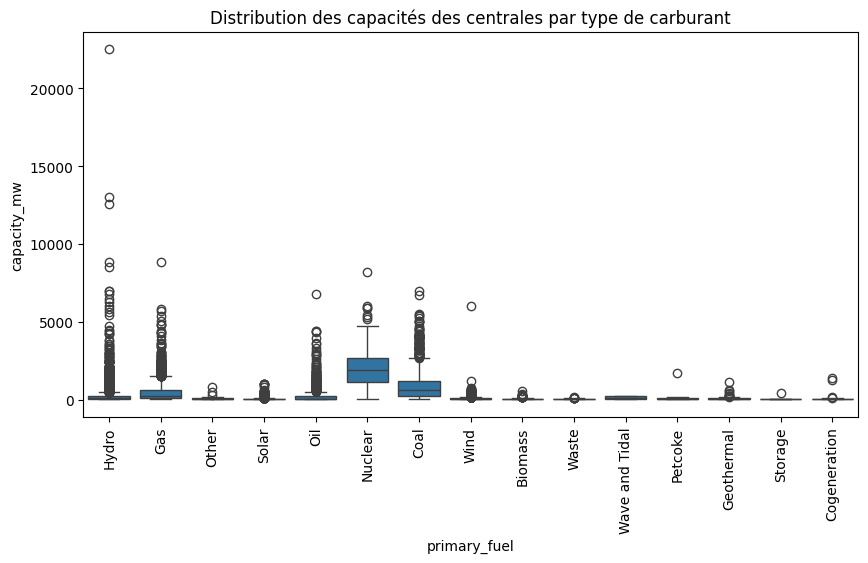

In [24]:

high_capacity = df[df['capacity_mw'] > np.median(df['capacity_mw'])]


plt.figure(figsize=(10, 5))
sns.boxplot(x='primary_fuel', y='capacity_mw', data=high_capacity)
plt.xticks(rotation=90)
plt.title("Distribution des capacités des centrales par type de carburant")
plt.show()
